In [52]:
import json
import pandas as pd
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
from shapely.wkt import loads
import cv2 as cv

In [53]:
label_file = open('./Data/Json/mexico-earthquake_00000000_post_disaster.json')
label_data =json.load(label_file)
img = image.imread('./Data/Images/mexico-earthquake_00000000_post_disaster.png')

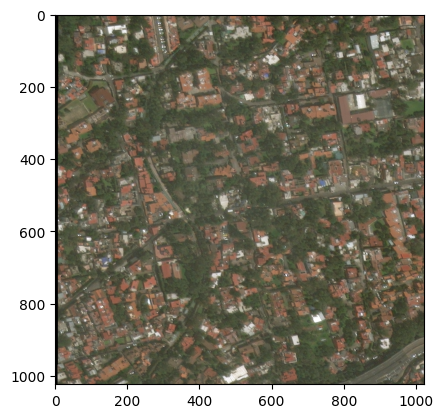

In [54]:
plt.imshow(img)

In [84]:
label_data

{'features': {'lng_lat': [{'properties': {'feature_type': 'building',
     'subtype': 'no-damage',
     'uid': '3a5a5786-0a52-47b8-9acb-05e585d93a1f'},
    'wkt': 'POLYGON ((-99.22754999843229 19.32385280468203, -99.2275629364801 19.32384197973106, -99.22768857198183 19.3238338771825, -99.22772606730923 19.32387262717651, -99.22773111961595 19.32389270687316, -99.22759200037186 19.32400028707968, -99.22754590420298 19.32400034459484, -99.22754999843229 19.32385280468203))'},
   {'properties': {'feature_type': 'building',
     'subtype': 'no-damage',
     'uid': 'eb976e24-e1b2-4700-8637-6cdccc3f9b79'},
    'wkt': 'POLYGON ((-99.22461370430985 19.3258007610434, -99.22459444519932 19.32570639367051, -99.22459853213414 19.32569492342359, -99.22487806058535 19.32563891345981, -99.22490587426057 19.32575265609086, -99.22462307240276 19.32580840756783, -99.22461370430985 19.3258007610434))'},
   {'properties': {'feature_type': 'building',
     'subtype': 'no-damage',
     'uid': '76667c18-a00

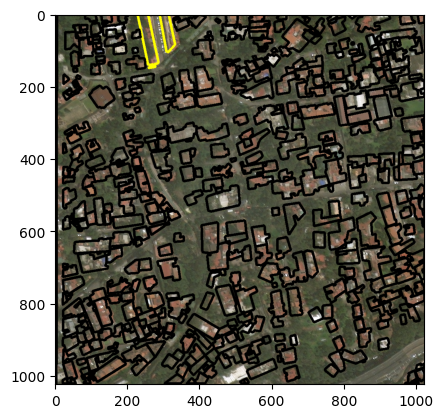

In [97]:
colours_dict = {'no-damage':None,
           'minor-damage':[1,1,0]
           }


polygons = []
damage_state = []
colours = []
for _obj in label_data['features']['xy']:
    _polygon = loads(_obj['wkt'])
    polygon = np.array(list(_polygon.exterior.coords),dtype=np.int32)
    colour = colours_dict[_obj['properties']['subtype']]
    img = cv.polylines(img,[polygon],True,colour,5)
    
plt.imshow(img)